In [12]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import numpy as np

In [36]:
ds_base = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_bc/OutputDir/GEOSChem.SpeciesConc.2016*')
ds_nonuc_renew = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/renew_nonuc_bc/OutputDir/GEOSChem.SpeciesConc.2016*')
ds_nonuc = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/nonuc_bc/OutputDir/GEOSChem.SpeciesConc.2016*')

In [37]:
ds_base_NA = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_NA/OutputDir/GEOSChem.SpeciesConc.201508*')
ds_nonuc_renew_NA = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/renew_nonuc_NA/OutputDir/GEOSChem.SpeciesConc.20150805_0000z.nc4*')

In [40]:
def calc_pm(ds):
    ds['PM25'] = (( ds['SpeciesConc_NH4'] + ds['SpeciesConc_NIT']  + ds['SpeciesConc_SO4'] ) * 1.10
         + ds['SpeciesConc_BCPI'] 
         + ds['SpeciesConc_BCPO'] 
         + ( ds['SpeciesConc_OCPO'] + ( ds['SpeciesConc_OCPI'] * 1.05 ) ) * (2.1)  # OM/OC ratio = 2.1 by default
         + ds['SpeciesConc_DST1'] 
         + ds['SpeciesConc_DST2'] * 0.30                                 # F. Yu suggests 30% of DST2 (Nov 2011); prior value was 38% of DST2
         + ds['SpeciesConc_SALA'] * 1.86
        # + ds['SpeciesConc_SOA']  * 1.05
                 )
    return (ds['PM25'])

In [49]:
ds_nonuc_renew['PM25'] = calc_pm(ds_nonuc_renew)*1e9

In [50]:
ds_base['PM25'] = calc_pm(ds_base)*1e9

In [72]:
ds_nonuc['PM25'] = calc_pm(ds_nonuc)*1e9

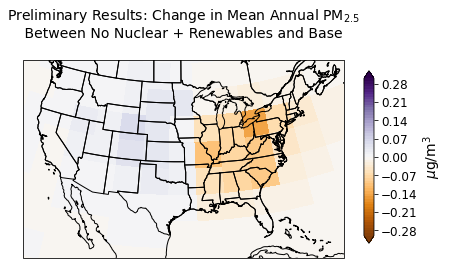

In [78]:
### PM No Nuclear plot ###
fig = plt.figure(figsize=[14,8])

cmap = 'PuOr'
lev_pol =   np.squeeze(np.arange(-.3,0.31,.01))
ax_pm = fig.add_subplot(2,2,3, projection=ccrs.LambertConformal())
pm = (ds_base['PM25']-ds_nonuc_renew['PM25']).isel(lev = 0).mean(dim = 'time').plot(ax = ax_pm, 
                                                         cmap = cmap, add_colorbar = False,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev_pol, 
                                                         extend = 'both')
ax_pm.set_title(r' ', fontsize = 16)
ax_pm.add_feature(cfeat.STATES)
ax_pm.coastlines()
ax_pm.set_extent([-120,-70,20,50])

ax_pm.set_title(r'Preliminary Results: Change in Mean Annual PM$_{2.5}$' + '\n Between No Nuclear + Renewables and Base \n', fontsize = 14);


## PM colorbar ##
cbar_ax = fig.add_axes([.48, 0.15, 0.01, 0.3])
cb = fig.colorbar(pm, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 
cb.set_label(label = r'$\mu$g/m$^3$', fontsize=14)
cb.ax.tick_params(labelsize='large')


plt.savefig('preliminary_renewables_pm.pdf', dpi = 250, bbox_inches = 'tight')

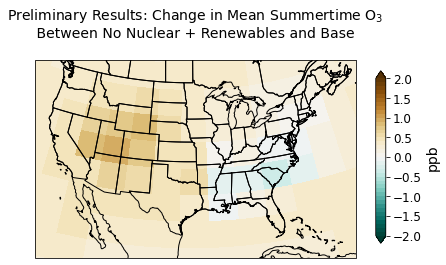

In [79]:
### PM No Nuclear plot ###
fig = plt.figure(figsize=[14,8])

cmap = 'BrBG_r'
lev_pol =   np.squeeze(np.arange(-2.0,2.1,.1))
ax_o3 = fig.add_subplot(2,2,3, projection=ccrs.LambertConformal())
o3 = ((ds_base['SpeciesConc_O3']-ds_nonuc_renew['SpeciesConc_O3'])*1e9).isel(lev = 0).groupby('time.season').mean(dim = 'time').sel(season = 'JJA').plot(ax = ax_o3, 
                                                         cmap = cmap, add_colorbar = False,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev_pol, 
                                                         extend = 'both')
ax_o3.set_title(r' ', fontsize = 16)
ax_o3.add_feature(cfeat.STATES)
ax_o3.coastlines()
ax_o3.set_extent([-120,-70,20,50])


## O3 colorbar ##
cbar_ax =  fig.add_axes([.48, 0.15, 0.01, 0.3])
cb = fig.colorbar(o3, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 
cb.set_label(label = r'ppb', fontsize=14)
cb.ax.tick_params(labelsize='large')

ax_o3.set_title(r'Preliminary Results: Change in Mean Summertime O$_3$' + '\n Between No Nuclear + Renewables and Base \n', fontsize = 14);
plt.savefig('preliminary_renewables_o3.pdf', dpi = 250, bbox_inches = 'tight')

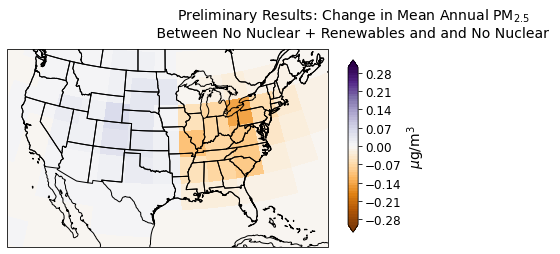

In [73]:
### PM No Nuclear plot ###
fig = plt.figure(figsize=[14,8])

cmap = 'PuOr'
lev_pol =   np.squeeze(np.arange(-.3,0.31,.01))
ax_pm = fig.add_subplot(2,2,3, projection=ccrs.LambertConformal())
pm = (ds_base['PM25']-ds_nonuc_renew['PM25']).isel(lev = 0).mean(dim = 'time').plot(ax = ax_pm, 
                                                         cmap = cmap, add_colorbar = False,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev_pol, 
                                                         extend = 'both')
ax_pm.set_title(r' ', fontsize = 16)
ax_pm.add_feature(cfeat.STATES)
ax_pm.coastlines()
ax_pm.set_extent([-120,-70,20,50])


## PM colorbar ##
cbar_ax = fig.add_axes([.48, 0.15, 0.01, 0.3])
cb = fig.colorbar(pm, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 
cb.set_label(label = r'$\mu$g/m$^3$', fontsize=14)
cb.ax.tick_params(labelsize='large')


plt.title(r'Preliminary Results: Change in Mean Annual PM$_{2.5}$' + '\n Between No Nuclear + Renewables and and No Nuclear \n', fontsize = 14);
#plt.savefig('preliminary_renewables_pm.pdf', dpi = 250, bbox_inches = 'tight')

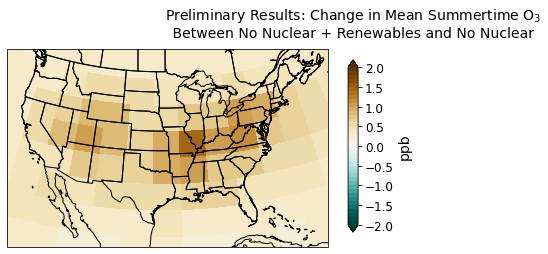

In [74]:
### PM No Nuclear plot ###
fig = plt.figure(figsize=[14,8])

cmap = 'BrBG_r'
lev_pol =   np.squeeze(np.arange(-2.0,2.1,.1))
ax_o3 = fig.add_subplot(2,2,3, projection=ccrs.LambertConformal())
o3 = ((ds_nonuc['SpeciesConc_O3']-ds_nonuc_renew['SpeciesConc_O3'])*1e9).isel(lev = 0).groupby('time.season').mean(dim = 'time').sel(season = 'JJA').plot(ax = ax_o3, 
                                                         cmap = cmap, add_colorbar = False,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev_pol, 
                                                         extend = 'both')
ax_o3.set_title(r' ', fontsize = 16)
ax_o3.add_feature(cfeat.STATES)
ax_o3.coastlines()
ax_o3.set_extent([-120,-70,20,50])


## O3 colorbar ##
cbar_ax =  fig.add_axes([.48, 0.15, 0.01, 0.3])
cb = fig.colorbar(o3, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 
cb.set_label(label = r'ppb', fontsize=14)
cb.ax.tick_params(labelsize='large')

plt.title(r'Preliminary Results: Change in Mean Summertime O$_3$' + '\n Between No Nuclear + Renewables and No Nuclear \n', fontsize = 14);
#plt.savefig('preliminary_renewables_o3.pdf', dpi = 250, bbox_inches = 'tight')

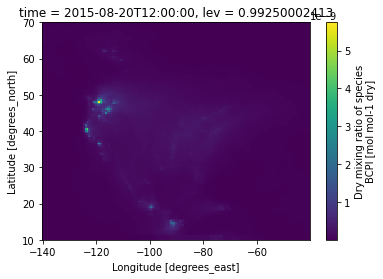

In [10]:
ds_nonuc_renew_NA['SpeciesConc_BCPI'].isel(lev = 0).plot()

In [12]:
ds_base_hemco = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_NA/OutputDir/HEMCO_diagnostics.201506020000.nc')
ds_nonuc_renew_hemco = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/renew_nonuc_NA/OutputDir/HEMCO_diagnostics.201506020000.nc')

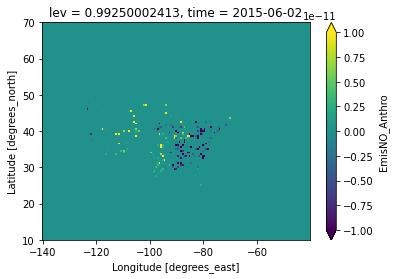

In [13]:
(ds_base_hemco-ds_nonuc_renew_hemco)['EmisNO_Anthro'].isel(lev = 0).plot(vmax = 1e-11, vmin = -1e-11)

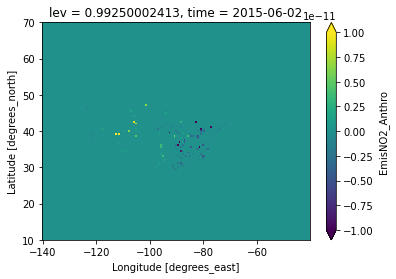

In [88]:
(ds_base_hemco-ds_nonuc_renew_hemco)['EmisNO2_Anthro'].isel(lev = 0).plot(vmax = 1e-11, vmin = -1e-11)

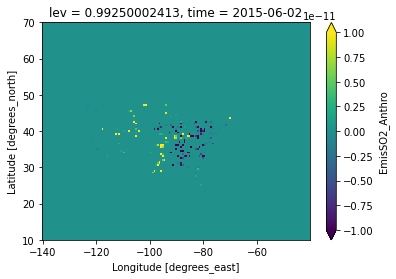

In [89]:
(ds_base_hemco-ds_nonuc_renew_hemco)['EmisSO2_Anthro'].isel(lev = 0).plot(vmax = 1e-11, vmin = -1e-11)

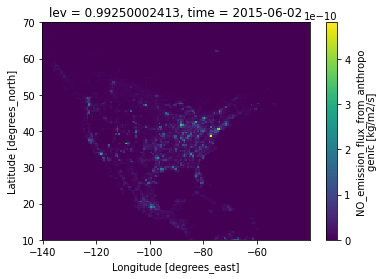

In [82]:
ds_base_hemco['EmisNO_Anthro'].isel(lev = 0).plot()

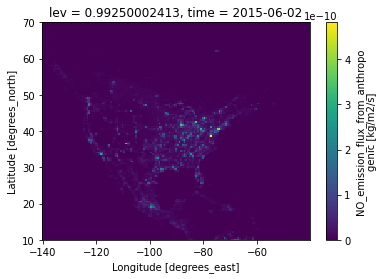

In [83]:
ds_nonuc_renew_hemco['EmisNO_Anthro'].isel(lev = 0).plot()

Text(0.5, 1.0, 'Base - Renewable')

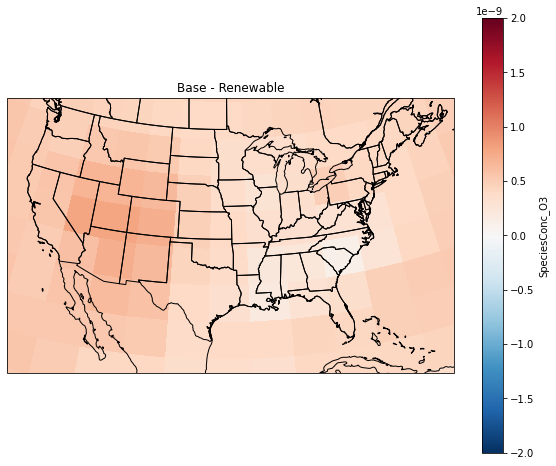

In [11]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_base.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_O3'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      vmin = -2e-9, vmax = 2e-9, transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('Base - Renewable')

Text(0.5, 1.0, 'Base - Renewable')

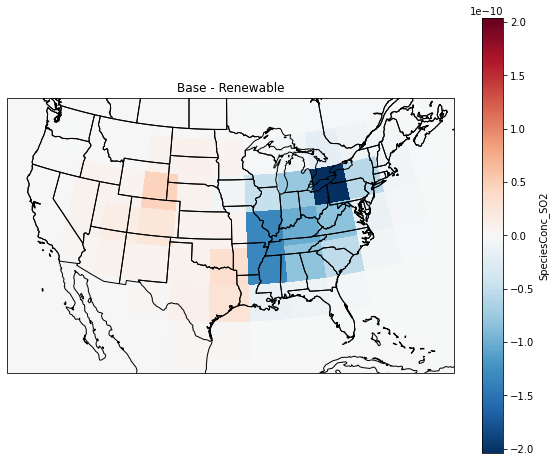

In [22]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_base.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_SO2'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('Base - Renewable')

Text(0.5, 1.0, 'Nonuc - Renewable')

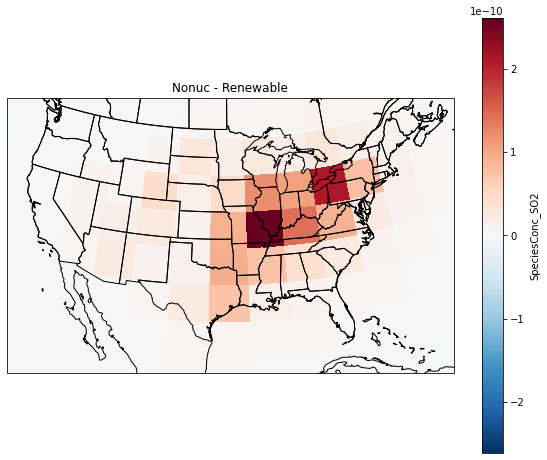

In [23]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_nonuc.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_SO2'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('Nonuc - Renewable')

Text(0.5, 1.0, 'Base - Renewable')

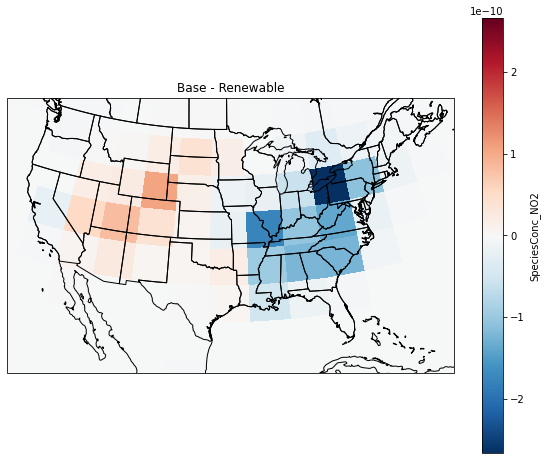

In [20]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_base.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_NO2'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('Base - Renewable')

Text(0.5, 1.0, 'Base - Renewable')

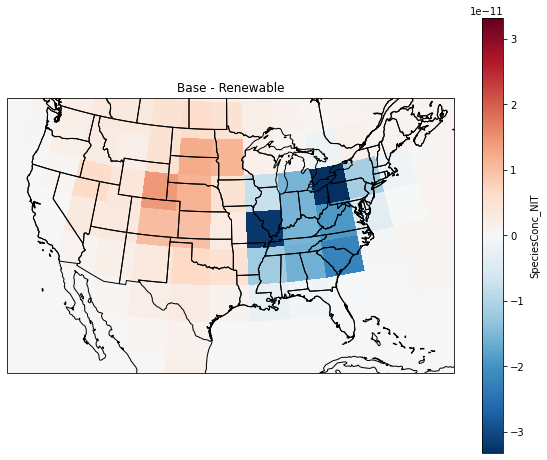

In [19]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_base.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_NIT'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('Base - Renewable')

Text(0.5, 1.0, 'No Nuc - Renewable')

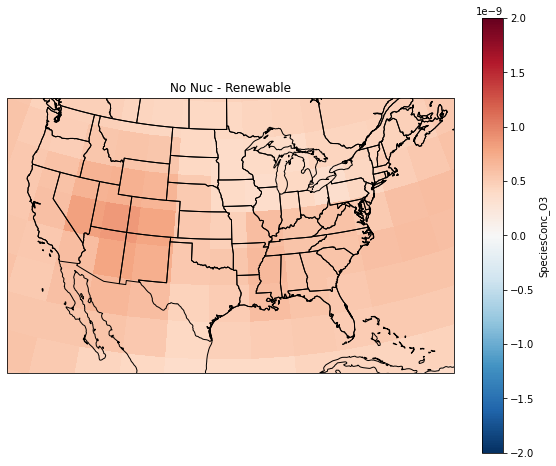

In [78]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_nonuc.mean(dim = 'time') - ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_O3'].isel(lev = 0).plot(ax =ax, cmap = 'RdBu_r', 
                                                                                                      vmin = -2e-9, vmax = 2e-9, transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title('No Nuc - Renewable')

Text(0.5, 1.0, 'No Nuc')

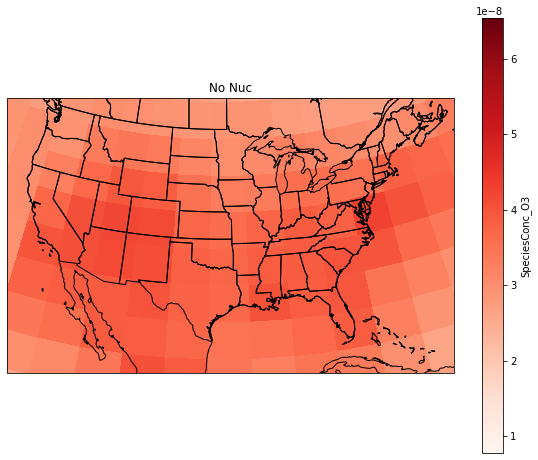

In [15]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_nonuc.mean(dim = 'time'))['SpeciesConc_O3'].isel(lev = 0).plot(ax =ax, cmap = 'Reds', transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title("No Nuc")

Text(0.5, 1.0, 'Base')

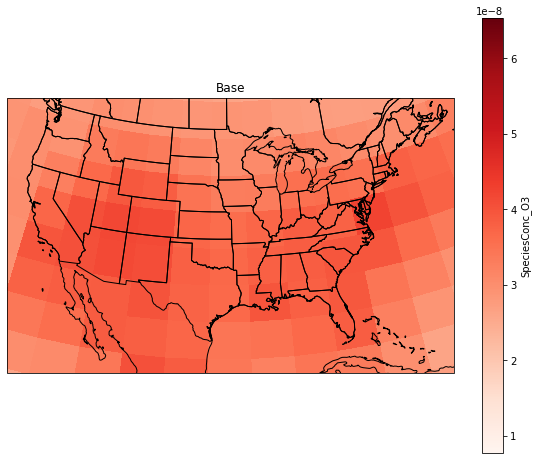

In [16]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_base.mean(dim = 'time'))['SpeciesConc_O3'].isel(lev = 0).plot(ax =ax, cmap = 'Reds', transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title("Base")

Text(0.5, 1.0, 'No Nuc Renewable')

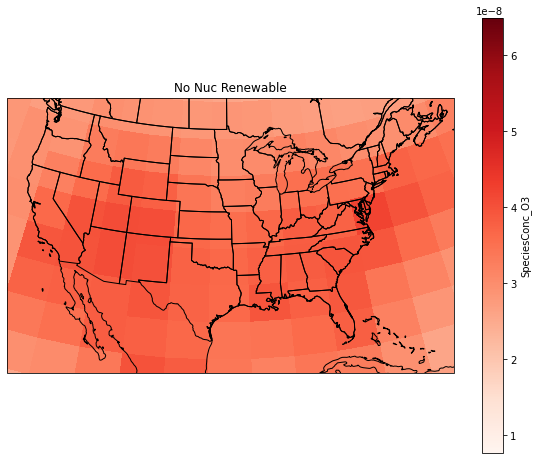

In [17]:
fig, ax =  plt.subplots(figsize=[10,8],subplot_kw={'projection':ccrs.LambertConformal()})
(ds_nonuc_renew.mean(dim = 'time'))['SpeciesConc_O3'].isel(lev = 0).plot(ax =ax, cmap = 'Reds', transform=ccrs.PlateCarree())

ax.add_feature(cfeat.STATES)
ax.coastlines() #add coastlines
ax.set_extent([-120,-70,20,50])
plt.title("No Nuc Renewable")

In [20]:
ds_base_aer = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/normal_bc/OutputDir/GEOSChem.BoundaryConditions.201612*')
ds_nonuc_renew_aer = xr.open_mfdataset('/net/fs11/d0/emfreese/GCrundirs/nuclearproj/renew_nonuc_bc/OutputDir/GEOSChem.BoundaryConditions.201612*')

In [24]:
ds_base_aer

<xarray.Dataset>
Dimensions:             (time: 248, lev: 47, ilev: 48, lat: 16, lon: 21)
Coordinates:
  * time                (time) datetime64[ns] 2016-12-01 ... 2016-12-31T21:00:00
  * lev                 (lev) float64 0.9925 0.9775 0.9625 ... 0.0001387 3.8e-05
  * ilev                (ilev) float64 1.0 0.985 0.97 ... 6.6e-05 1e-05
  * lat                 (lat) float64 10.0 14.0 18.0 22.0 ... 62.0 66.0 70.0
  * lon                 (lon) float64 -140.0 -135.0 -130.0 ... -50.0 -45.0 -40.0
Data variables: (12/210)
    hyam                (time, lev) float64 dask.array<chunksize=(8, 47), meta=np.ndarray>
    hybm                (time, lev) float64 dask.array<chunksize=(8, 47), meta=np.ndarray>
    hyai                (time, ilev) float64 dask.array<chunksize=(8, 48), meta=np.ndarray>
    hybi                (time, ilev) float64 dask.array<chunksize=(8, 48), meta=np.ndarray>
    P0                  (time) float64 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
    AREA                (time, lat, lon) float32 dask.array<chunksize=(8, 16, 21), meta=np.ndarray>
    ...                  ...
    SpeciesBC_ATOOH     (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
    SpeciesBC_ALK4      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
    SpeciesBC_ALD2      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
    SpeciesBC_AERI      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
    SpeciesBC_ACTA      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
    SpeciesBC_ACET      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 47, 16, 21), meta=np.ndarray>
Attributes:
    title:                           GEOS-Chem diagnostic collection: Boundar...
    history:                         
    format:                          not found
    conventions:                     COARDS
    ProdDateTime:                    
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2016-08-01 00:00:00z
    simulation_end_date_and_time:    2017-01-01 00:00:00z